## 1) Finding the Coupling Coefficients:

In [67]:
import numpy as np
import pickle, gzip, numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import random

In [68]:
sigma_1 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
sigma_2 = np.array([-1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1])
sigma_3 = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1])
sigma_4 = np.array([1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1])

### Print the figures:

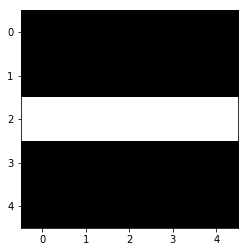

In [69]:
sigma_1_show = np.array(sigma_1).reshape(5, 5)
sigma_2_show = np.array(sigma_2).reshape(5, 5)
sigma_3_show = np.array(sigma_3).reshape(5, 5)
sigma_4_show = np.array(sigma_4).reshape(5, 5)
plt.imshow(sigma_1_show, cmap = cm.Greys_r)
# plt.imshow(sigma_2_show, cmap = cm.Greys_r)
# plt.imshow(sigma_3_show, cmap = cm.Greys_r)
# plt.imshow(sigma_4_show, cmap = cm.Greys_r)

In [70]:
s = np.zeros(shape=(25,25))

for i in range(25):
    for j in range(25):
        s[i][j] = 1/25 * (sigma_1[i] * sigma_1[j] + sigma_2[i] * sigma_2[j] + sigma_3[i] * sigma_3[j] + sigma_4[i] * sigma_4[j])
    
# print(25 * s)

This generates a 25 by 25 matrix of the coupling coefficients.

## 2) Assign the initial state $v_i(0)$ and update the network:

### Test with a sample square, see if converge.

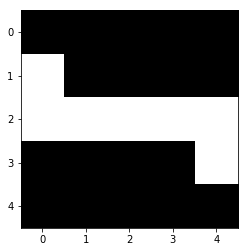

In [79]:
sigma_test = np.array([-1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1])
sigma_test_resized = np.array(sigma_test).reshape(5, 5)
plt.imshow(sigma_test_resized, cmap = cm.Greys_r)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.]


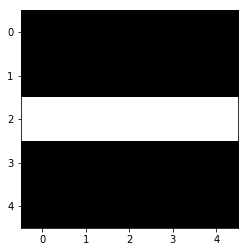

In [80]:
V = sigma_test # this is the initial state (I guess it's the where the tested image goes)
new_V = np.ones(25)

for i in range(25):
    total = 0
    for j in range(25):
        total += s[i][j] * V[j]
    
    if total >= 0:
        new_V[i] = 1
    else:
        new_V[i] = -1

V = new_V
print(V)
sigma_test_resized = np.array(V).reshape(5, 5)
plt.imshow(sigma_test_resized, cmap = cm.Greys_r)